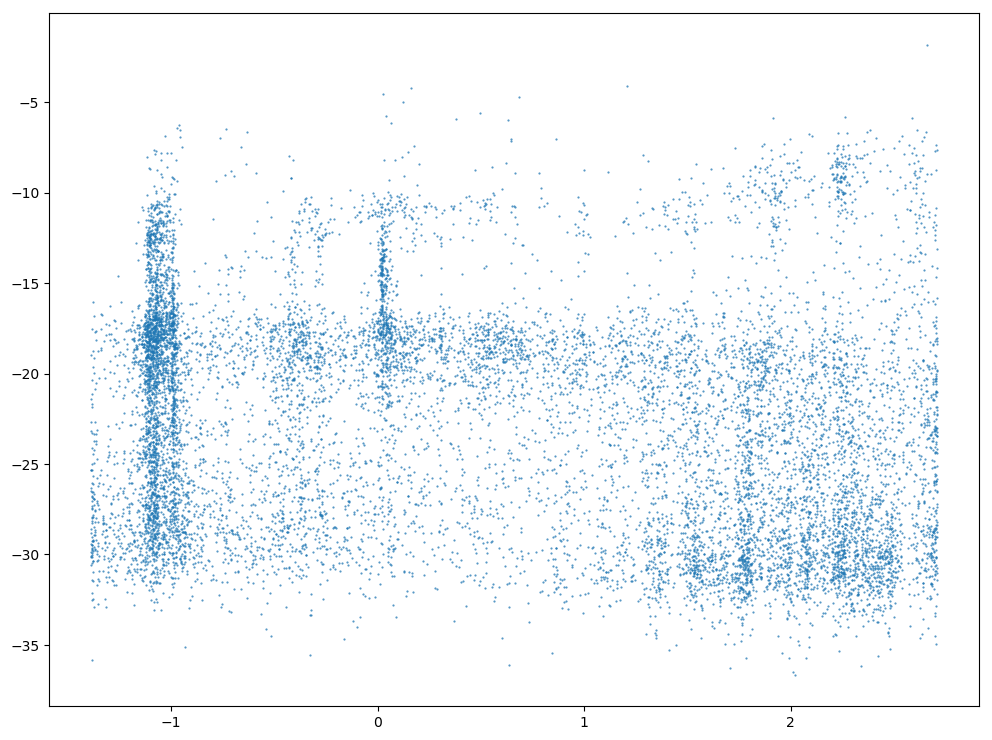

PyObject <matplotlib.collections.PathCollection object at 0x000000002D106588>

In [4]:
using CSV
using PyPlot

data = CSV.read("master.csv")
figure(figsize=(12,9))
scatter(log.(data[:Guessed_Period]), log.(data[:Peak_Zeta]), alpha=0.8, s=0.3)

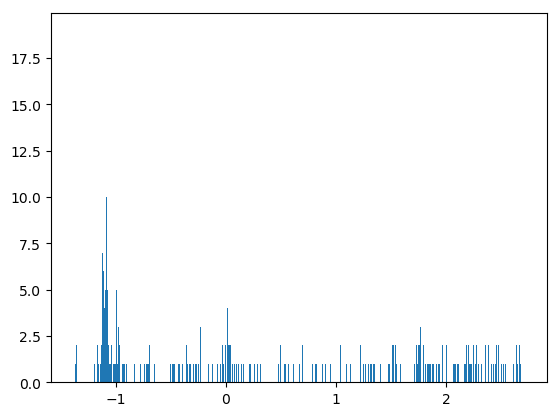

([19.0, 6.0, 3.0, 0.0, 0.0, 0.0, 4.0, 1.0, 0.0, 1.0  …  0.0, 3.0, 3.0, 3.0, 4.0, 3.0, 2.0, 2.0, 3.0, 17.0], [-1.38629, -1.38613, -1.38596, -1.38579, -1.38563, -1.38546, -1.38529, -1.38513, -1.38496, -1.38479  …  2.70654, 2.70671, 2.70687, 2.70704, 2.70721, 2.70737, 2.70754, 2.70771, 2.70787, 2.70804], PyCall.PyObject[PyObject <matplotlib.patches.Rectangle object at 0x0000000066A80898>, PyObject <matplotlib.patches.Rectangle object at 0x0000000066A80550>, PyObject <matplotlib.patches.Rectangle object at 0x0000000066AA0A58>, PyObject <matplotlib.patches.Rectangle object at 0x0000000066AABB38>, PyObject <matplotlib.patches.Rectangle object at 0x0000000066AC0C50>, PyObject <matplotlib.patches.Rectangle object at 0x0000000066ACB588>, PyObject <matplotlib.patches.Rectangle object at 0x0000000066A95C18>, PyObject <matplotlib.patches.Rectangle object at 0x0000000066AD56D8>, PyObject <matplotlib.patches.Rectangle object at 0x0000000066AD5710>, PyObject <matplotlib.patches.Rectangle object at 0x

In [44]:
h = PyPlot.plt[:hist](log.(data[:Guessed_Period]),24567)

In [14]:
using DataFrames
periods = DataFrame(period=Float64[], count=Int32[])
for i in data[:Guessed_Period]
    if typeof(i) != Missings.Missing
        if i in periods[:period]
            periods[periods[:period].==i, :count] += 1
        else
            push!(periods, [i, 1])
        end
    end
end
sort!(periods, [:count], rev=true)
print(periods)

8793×2 DataFrames.DataFrame
│ Row  │ period   │ count │
├──────┼──────────┼───────┤
│ 1    │ 14.9998  │ 14    │
│ 2    │ 0.25     │ 14    │
│ 3    │ 0.338422 │ 10    │
│ 4    │ 0.331334 │ 10    │
│ 5    │ 0.331445 │ 9     │
│ 6    │ 0.336286 │ 9     │
│ 7    │ 0.343251 │ 9     │
│ 8    │ 0.341823 │ 9     │
⋮
│ 8785 │ 4.10226  │ 1     │
│ 8786 │ 2.32652  │ 1     │
│ 8787 │ 11.2989  │ 1     │
│ 8788 │ 7.3268   │ 1     │
│ 8789 │ 7.94365  │ 1     │
│ 8790 │ 1.89308  │ 1     │
│ 8791 │ 10.4146  │ 1     │
│ 8792 │ 5.50894  │ 1     │
│ 8793 │ 7.53234  │ 1     │

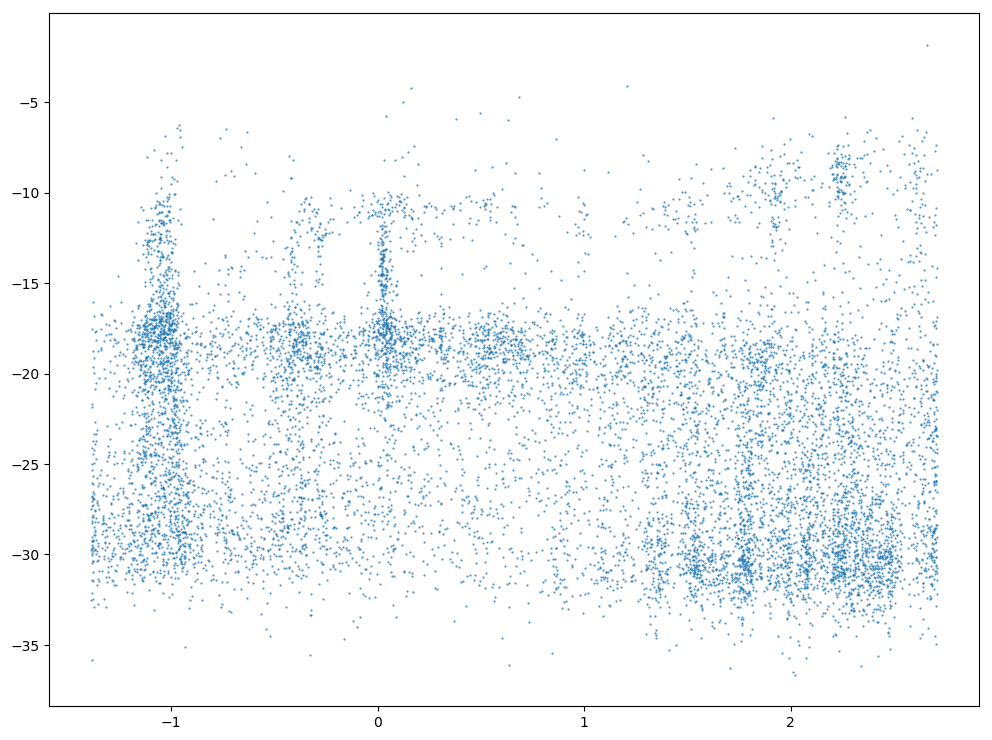

Cut 14.156905055487057% of data


PyObject <matplotlib.collections.PathCollection object at 0x000000005A00F240>

In [42]:
cutdata = deepcopy(data)
for i in 1:size(periods, 1)
    if periods[i, :count] > 3
        cutdata = cutdata[cutdata[:Guessed_Period] .!= periods[i, :period], :]
    end
end

println("Cut " * string((1-size(cutdata)[1]/size(data)[1])*100) * "% of data")
figure(figsize=(12,9))
scatter(log.(cutdata[:Guessed_Period]), log.(cutdata[:Peak_Zeta]), alpha=0.8, s=0.3)

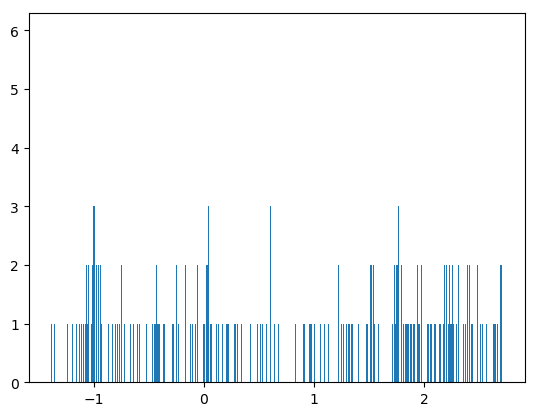

([3.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 3.0, 1.0, 1.0  …  0.0, 3.0, 3.0, 3.0, 0.0, 3.0, 2.0, 0.0, 2.0, 6.0], [-1.38579, -1.38563, -1.38546, -1.38529, -1.38513, -1.38496, -1.38479, -1.38463, -1.38446, -1.38429  …  2.70637, 2.70654, 2.70671, 2.70687, 2.70704, 2.70721, 2.70737, 2.70754, 2.70771, 2.70787], PyCall.PyObject[PyObject <matplotlib.patches.Rectangle object at 0x0000000059EA9128>, PyObject <matplotlib.patches.Rectangle object at 0x0000000059EB56A0>, PyObject <matplotlib.patches.Rectangle object at 0x0000000059EA9710>, PyObject <matplotlib.patches.Rectangle object at 0x0000000059EA9A58>, PyObject <matplotlib.patches.Rectangle object at 0x0000000059EA9DA0>, PyObject <matplotlib.patches.Rectangle object at 0x0000000059E90128>, PyObject <matplotlib.patches.Rectangle object at 0x0000000059E90470>, PyObject <matplotlib.patches.Rectangle object at 0x0000000059E907B8>, PyObject <matplotlib.patches.Rectangle object at 0x0000000059E90B00>, PyObject <matplotlib.patches.Rectangle object at 0x00

In [43]:
h = PyPlot.plt[:hist](log.(cutdata[:Guessed_Period]),24567)

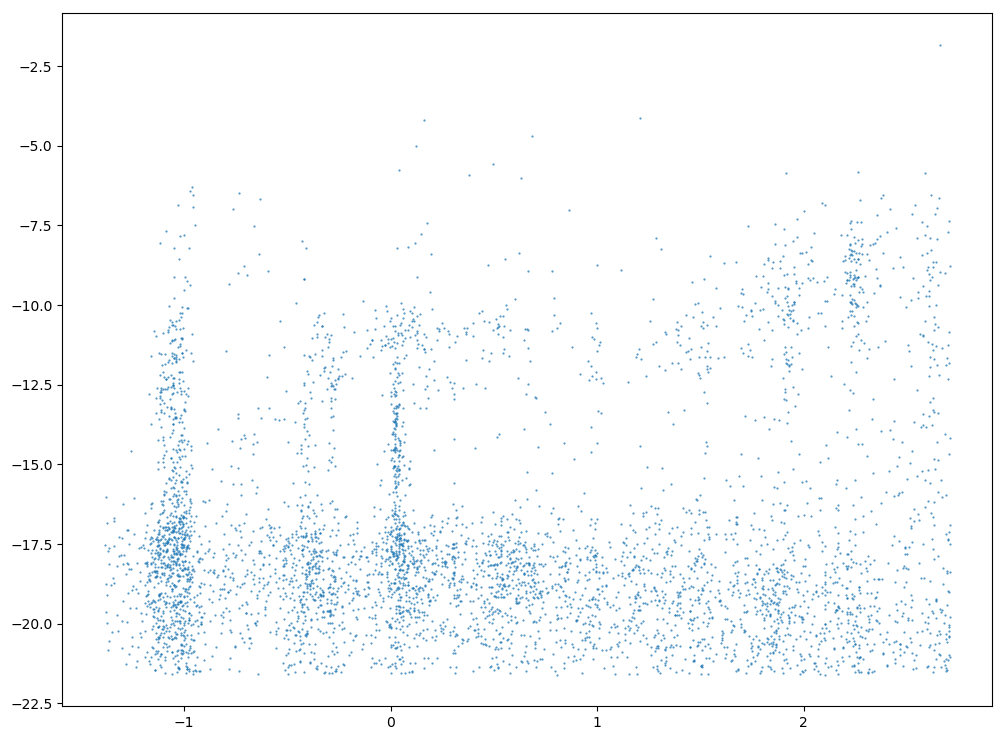

PyObject <matplotlib.collections.PathCollection object at 0x0000000080CCD3C8>

In [51]:
sort!(cutdata, [:Peak_Zeta], rev=true)
notable = cutdata[1:5000, :]
figure(figsize=(12,9))
scatter(log.(notable[:Guessed_Period]), log.(notable[:Peak_Zeta]), alpha=0.8, s=0.3)